In [156]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils

In [7]:
#Initialize dlib's face predictor
detect=dlib.get_frontal_face_detector()
predict=dlib.shape_predictor("/Users/r17935avinash/Downloads/shape_predictor_68_face_landmarks.dat")

In [211]:
#cnvtrect convert dlib rectangle to numpy list
def cnvtrect(rect,image):
    shape=[]
    for rect in rects:
        if rect.left()<0:
            x1=0
        else:
            x1=rect.left()
        if rect.top()<0:
            y1=0
        else:
            y1=rect.top()
        if rect.right()>image.shape[1]:
            x2=image.shape[1]
        else:
            x2=rect.right()
        if rect.bottom()>image.shape[0]:
            y2=image.shape[0]
        else:
            y2=rect.bottom()
        shape.append((x1,y1,x2,y2))
    return shape

In [220]:
#facial keypoints detection
def fkd(rects,image):
    for (x1,y1,x2,y2) in cnvtrect(rects,image):
        rect=dlib.rectangle(x1,y1,x2,y2)
        shape=predict(image,rect)
        shape=face_utils.shape_to_np(shape)
        for (x,y) in shape:
            cv2.circle(image,(x,y),1,(255,0,0),-1)
    return image,shape

In [232]:

def colour_lips(image,shape,color,alpha=0.5):
    #colour upper lip using keypoints
    copy=image.copy()
    op=image.copy()
    lip=np.zeros((10,2))
    lip[0:6]=shape[48:54]
    lip[6:10]=shape[60:64]
    lip=lip.astype('float32')
    hull = cv2.convexHull(lip)
    hull=hull.astype('int32')
    cv2.drawContours(copy, [hull], -1, color, -1)
    
    #colour lower lip using keypts
    dlip=np.zeros((9,2))
    dlip[0:5]=shape[55:60]
    dlip[5:8]=shape[64:67]
    dlip[8]=shape[48]
    dlip=dlip.astype('float32')
    dhull = cv2.convexHull(dlip)
    dhull=dhull.astype('int32')
    cv2.drawContours(copy, [dhull], -1, color, -1)
    cv2.addWeighted(copy, alpha, op, 1 - alpha, 0, op)
    return op



In [249]:
image=cv2.imread("/Users/r17935avinash/Downloads/index_face.jpg")
imagecopy=cv2.imread("/Users/r17935avinash/Downloads/index_face.jpg")
bgr=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rects=detect(bgr,1)

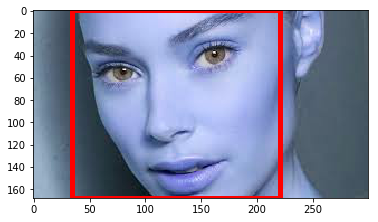

In [250]:
#face detection
for (x1,y1,x2,y2) in cnvtrect(rects,image):
    cv2.rectangle(image,(x1,y1),(x2,y2),(255,0,0),4)
plt.imshow(image)


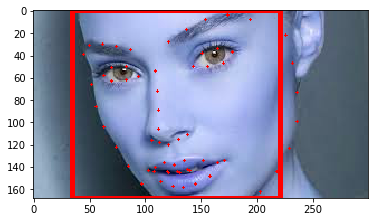

In [238]:
#call function for fkd
image,shape=fkd(rects,image)
plt.imshow(image)

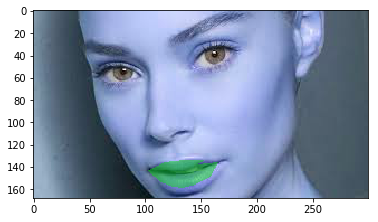

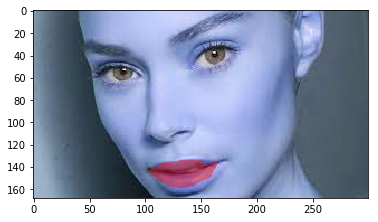

True

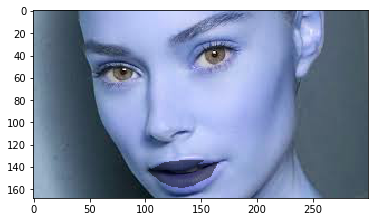

In [243]:
copy_green=colour_lips(imagecopy,shape,(20,220,30))
plt.imshow(copy_green)
plt.show()
copy_red=colour_lips(imagecopy,shape,(230,25,30))
plt.imshow(copy_red)
plt.show()
copy_black=colour_lips(imagecopy,shape,(0,0,0))
plt.imshow(copy_black)
cv2.imwrite("/Users/r17935avinash/Downloads/Novaturient AI/red_lips.jpg",copy_red)
cv2.imwrite("/Users/r17935avinash/Downloads/Novaturient AI/black_lips.jpg",copy_black)
cv2.imwrite("/Users/r17935avinash/Downloads/Novaturient AI/green_lips.jpg",copy_green)